Please upload an image file (e.g., jpg, png):


Saving nature.jpg to nature.jpg

Select a task to perform:
1: Reduce Intensity Levels
2: Spatial Averaging (Mean Filter)
3: Image Rotation
4: Spatial Resolution Reduction (Block Averaging)
Enter task number (1-4): 1
Output saved as task1/task1_64_levels.jpg


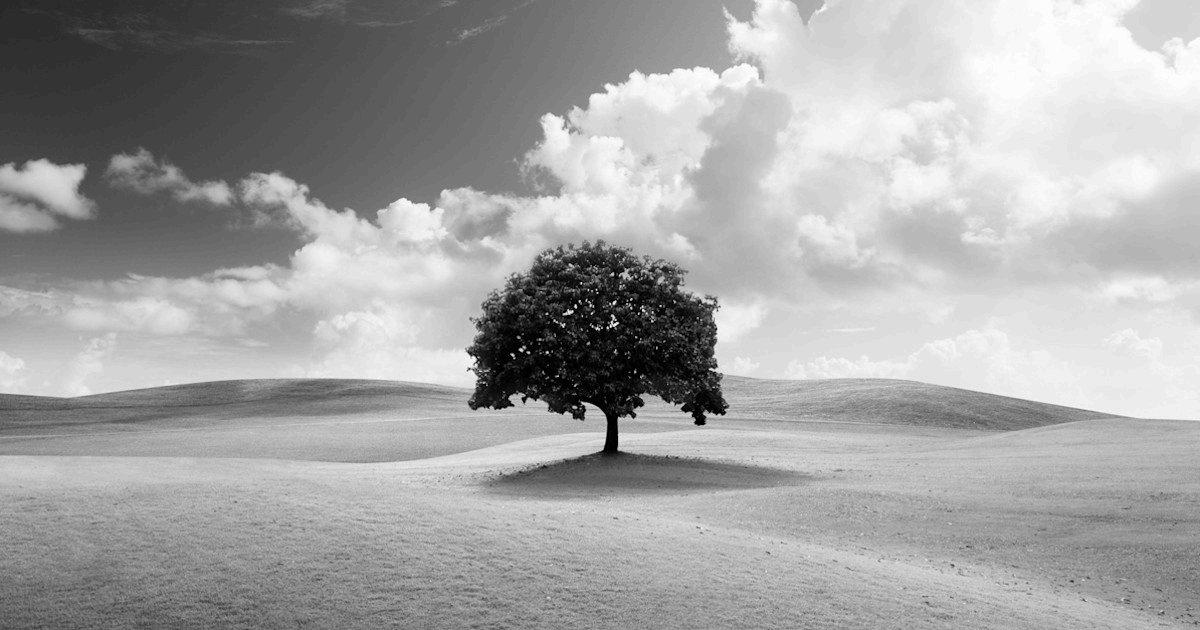

In [1]:
import cv2
import numpy as np
import os
import platform
import matplotlib.pyplot as plt

# Colab-specific imports (will be skipped if not in Colab)
try:
    from google.colab.patches import cv2_imshow
    from google.colab import files
    import io
    IS_COLAB = True
except ImportError:
    IS_COLAB = False

def reduce_intensity_levels(image, levels):
    """
    Reduce the number of intensity levels in an image (Task 1).
    Levels should be a power of 2 (e.g., 2, 4, 8, ..., 256).
    """
    if not (levels > 0 and (levels & (levels - 1)) == 0):
        raise ValueError("Number of levels must be a positive power of 2")

    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    factor = 256 / levels
    reduced_image = (image // factor) * factor
    return reduced_image.astype(np.uint8)

def apply_spatial_averaging(image, kernel_size):
    """
    Apply spatial averaging with a specified kernel size (Task 2).
    """
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
    averaged_image = cv2.filter2D(image, -1, kernel)
    return averaged_image

def rotate_image(image, angle):
    """
    Rotate image by a specified angle in degrees (Task 3).
    """
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def reduce_spatial_resolution(image, block_size):
    """
    Reduce spatial resolution by averaging over non-overlapping blocks (Task 4).
    """
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    h, w = image.shape
    new_h, new_w = h // block_size, w // block_size
    result = np.zeros((new_h * block_size, new_w * block_size), dtype=np.uint8)

    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            if block.shape == (block_size, block_size):
                avg = np.mean(block).astype(np.uint8)
                result[i:i+block_size, j:j+block_size] = avg

    return result

def display_image(image, title):
    """
    Display image using cv2_imshow in Colab or matplotlib locally.
    """
    if IS_COLAB:
        cv2_imshow(image)
    else:
        plt.figure(figsize=(6, 6))
        if len(image.shape) == 2:
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
        plt.show()

def load_image():
    """
    Load image either by uploading in Colab or reading from a local path.
    """
    if IS_COLAB:
        print("Please upload an image file (e.g., jpg, png):")
        uploaded = files.upload()
        if not uploaded:
            raise FileNotFoundError("No image uploaded. Please upload an image file.")
        file_name = list(uploaded.keys())[0]
        image_data = uploaded[file_name]
        image = cv2.imdecode(np.frombuffer(image_data, np.uint8), cv2.IMREAD_UNCHANGED)
    else:
        file_path = input("Enter the path to your image file (e.g., image.jpg): ")
        image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

    if image is None:
        raise FileNotFoundError("Failed to load the image. Ensure the file is a valid image format.")

    return image

def create_output_directories():
    """
    Create directories for saving output images.
    """
    directories = ['task1', 'task2', 'task3', 'task4']
    for directory in directories:
        os.makedirs(directory, exist_ok=True)

def main():
    # Create output directories
    create_output_directories()

    # Load image
    image = load_image()

    # Prompt user to select a task
    print("\nSelect a task to perform:")
    print("1: Reduce Intensity Levels")
    print("2: Spatial Averaging (Mean Filter)")
    print("3: Image Rotation")
    print("4: Spatial Resolution Reduction (Block Averaging)")
    task = input("Enter task number (1-4): ")

    if task == '1':
        levels = 64  # As specified in the original Task 1
        result = reduce_intensity_levels(image, levels)
        output_file = f'task1/task1_{levels}_levels.jpg'
        cv2.imwrite(output_file, result)
        print(f"Output saved as {output_file}")
        display_image(result, f'Reduced to {levels} Intensity Levels')

    elif task == '2':
        kernel_sizes = [3, 10, 20]
        for size in kernel_sizes:
            result = apply_spatial_averaging(image, size)
            output_file = f'task2/task2_{size}x{size}.jpg'
            cv2.imwrite(output_file, result)
            print(f"Output saved as {output_file}")
            display_image(result, f'Averaged {size}x{size}')

    elif task == '3':
        angles = [45, 90]
        for angle in angles:
            result = rotate_image(image, angle)
            output_file = f'task3/task3_{angle}deg.jpg'
            cv2.imwrite(output_file, result)
            print(f"Output saved as {output_file}")
            display_image(result, f'Rotated {angle} Degrees')

    elif task == '4':
        block_sizes = [3, 5, 7]
        for size in block_sizes:
            result = reduce_spatial_resolution(image, size)
            output_file = f'task4/task4_{size}x{size}.jpg'
            cv2.imwrite(output_file, result)
            print(f"Output saved as {output_file}")
            display_image(result, f'Reduced Resolution {size}x{size}')

    else:
        print("Invalid task number. Please select a number between 1 and 4.")

if __name__ == "__main__":
    main()